In [1]:
# import libraries
import os
from os import listdir
import pandas as pd
import numpy as np
from numpy import asarray
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt
import cv2

Using TensorFlow backend.


# FIRST TASK: CLASSIFY FACES FROM NONE FACES

In [2]:
# image dataset path
dataset = 'face_images_train/'

In [3]:
# check image names
for picture in listdir(dataset) :
     if picture != 'Thumbs.db':
            print(picture)#print(picture[0])
            

face_1.JPG
face_10.jpg
face_11.jpg
face_12.jpg
face_13.jpg
face_14.jpg
face_15.jpg
face_16.jpg
face_17.jpg
face_18.jpg
face_19.jpg
face_2.jpg
face_20.jpg
face_21.jpg
face_22.jpg
face_23.jpg
face_24.jpg
face_25.jpg
face_26.jpg
face_27.jpg
face_28.jpg
face_29.jpg
face_3.jpg
face_30.jpg
face_31.jpg
face_32.jpg
face_33.JPG
face_34.JPG
face_35.JPG
face_36.JPG
face_37.JPG
face_38.JPG
face_39.jpg
face_4.jpg
face_40.jpg
face_5.jpg
face_6.jpg
face_7.jpg
face_8.jpg
face_9.jpg
not_face_1.jpg
not_face_10.jpg
not_face_11.jpg
not_face_12.jpg
not_face_13.jpg
not_face_14.jpg
not_face_15.jpg
not_face_16.jpg
not_face_17.jpg
not_face_18.jpg
not_face_19.jpg
not_face_2.jpg
not_face_20.jpg
not_face_21.jpg
not_face_22.jpg
not_face_23.jpg
not_face_24.jpg
not_face_25.jpg
not_face_26.jpg
not_face_27.jpg
not_face_28.jpg
not_face_29.jpg
not_face_3.jpg
not_face_30.jpg
not_face_31.jpg
not_face_32.jpg
not_face_33.jpg
not_face_34.jpg
not_face_35.jpg
not_face_36.jpg
not_face_37.jpg
not_face_38.jpg
not_face_39.jpg
not_

In [4]:
# function that creates features and targets
def load_images(directory):
    train_pictures = list()
    targets = list()
    gray_scaled = list()
    images = pd.DataFrame()
    print('Converting to numpy array ...')
    for picture in listdir(directory) :
         if picture != 'Thumbs.db':
                 # load the picture from directory
                photo = load_img(directory + picture, target_size = (224,224))
                
                #convert image to numpy array
                photo = img_to_array(photo, dtype='uint8')  
                
                #photo = photo.reshape(1, 224, 224, 3)
                
                # append to list
                #train_pictures.append(photo)
                
                # convert image to grayscale
                gray_scale = cv2.cvtColor(photo, cv2.COLOR_BGR2GRAY)
                gray_scaled.append(gray_scale)
                
                # label targets
                if picture[0] == 'f':
                    targets.append(1)
                else:
                    targets.append(0)
    print(' ')
    #print('Converting to Pandas dataframe ...') 

    #images['image_arrays'] = gray_scaled
    #images['targets'] = targets
    
    X_TRAIN = asarray(gray_scaled, dtype = 'uint8')
    Y_TRAIN = asarray(targets, dtype = 'uint8')
    print(' ')
    print('Done!')
    return X_TRAIN, Y_TRAIN #images

In [5]:
# calling the function
X,Y = load_images(dataset) #images = load_images(dataset)

Converting to numpy array ...
 
 
Done!


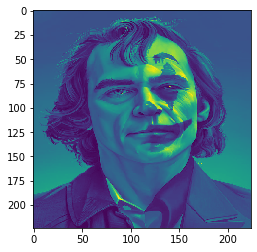

In [6]:
plt.imshow(X[1])

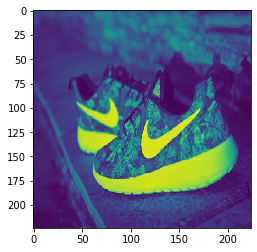

In [7]:
plt.imshow(X[47])

#### Reshape the data

In [8]:
X.shape

(80, 224, 224)

In [9]:
X = np.array(X).reshape((80, 224*224))

In [10]:
X.shape

(80, 50176)

#### Split the data

In [11]:
# split the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test = train_test_split(X,Y, test_size = 0.2, random_state = 3)

In [12]:
x_train.shape

(64, 50176)

In [13]:
x_test.shape

(16, 50176)

In [ ]:
#from sklearn.preprocessing import StandardScaler
#sc_x = StandardScaler()
#x_train = sc_x.fit_transform(x_train)
#x_test = sc_x.transform(x_test)

### Reducing the dimension of the Images

In [14]:
# Application of PCA
from sklearn.decomposition import PCA
pca = PCA()  #kernel ='rbf' # this takes the indpendent variables that interpret the dataset the best.

In [15]:
x_train_check = pca.fit(x_train)  #x_train_check = pca.fit_transform(x_train) 

In [16]:
explained_variance = pca.explained_variance_ratio_
explained_variance # this was used to know how many components the PCA would explain "the most the variance".


array([3.48576628e-01, 7.96200836e-02, 7.21341377e-02, 4.93873522e-02,
       4.11774363e-02, 2.76206436e-02, 2.63933161e-02, 2.51215191e-02,
       2.26197939e-02, 1.99725239e-02, 1.72138692e-02, 1.63714596e-02,
       1.56972453e-02, 1.43486901e-02, 1.32807761e-02, 1.18980070e-02,
       1.14137249e-02, 1.08530236e-02, 1.03172810e-02, 9.56782109e-03,
       8.96810255e-03, 8.13597589e-03, 7.79797319e-03, 7.57300495e-03,
       7.26254314e-03, 6.57303955e-03, 6.33976049e-03, 6.21969202e-03,
       6.11188103e-03, 5.84754548e-03, 5.55645906e-03, 5.26667921e-03,
       5.08566347e-03, 4.75439883e-03, 4.51239201e-03, 4.45463657e-03,
       4.11611685e-03, 4.03612233e-03, 3.77110383e-03, 3.69241834e-03,
       3.51672953e-03, 3.31376242e-03, 3.10284545e-03, 2.72760646e-03,
       2.62574143e-03, 2.46319051e-03, 2.40796920e-03, 2.29300321e-03,
       2.23641113e-03, 1.99398916e-03, 1.84748094e-03, 1.68681110e-03,
       1.55481780e-03, 1.47321259e-03, 1.41054620e-03, 1.20214218e-03,
      

In [17]:
cumsum = np.cumsum(explained_variance) # find the cummulative summation of that array
cumsum

array([0.34857663, 0.42819671, 0.50033085, 0.5497182 , 0.59089564,
       0.61851628, 0.6449096 , 0.67003112, 0.69265091, 0.71262343,
       0.7298373 , 0.74620876, 0.76190601, 0.7762547 , 0.78953547,
       0.80143348, 0.81284721, 0.82370023, 0.83401751, 0.84358533,
       0.85255343, 0.86068941, 0.86848738, 0.87606039, 0.88332293,
       0.88989597, 0.89623573, 0.90245542, 0.9085673 , 0.91441485,
       0.91997131, 0.92523799, 0.93032365, 0.93507805, 0.93959044,
       0.94404508, 0.9481612 , 0.95219732, 0.95596842, 0.95966084,
       0.96317757, 0.96649133, 0.96959418, 0.97232178, 0.97494753,
       0.97741072, 0.97981869, 0.98211169, 0.9843481 , 0.98634209,
       0.98818957, 0.98987638, 0.9914312 , 0.99290441, 0.99431496,
       0.9955171 , 0.99655435, 0.9974394 , 0.99825996, 0.99891484,
       0.99943954, 0.99978311, 1.        , 1.        ])

In [18]:
n_comp = np.argmax(cumsum >= 0.96) + 1 # return the indices in the cumsum with a value greater than 0.95 ... this value is 6( this is 6
# because of pythons indexing, then add plus 1: 7. 

In [19]:
n_comp

41

In [20]:
pca = PCA(n_components = n_comp)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [ ]:
# Basically the eigen faces are the vectors that best represent the large image matrices

In [21]:
eigenfaces = pca.components_.reshape((n_comp, 224, 224))

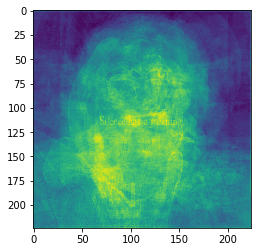

In [22]:
plt.imshow(eigenfaces[0])

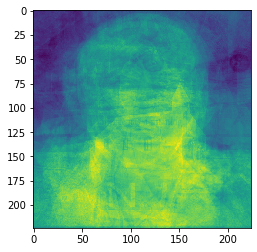

In [23]:
plt.imshow(eigenfaces[1])

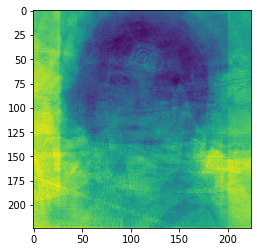

In [24]:
plt.imshow(eigenfaces[2])

In [26]:
# let us convert back to the original images from the compressed format.
X_recover = pca.inverse_transform(x_train)
X_recover= X_recover.reshape((64,224,224))

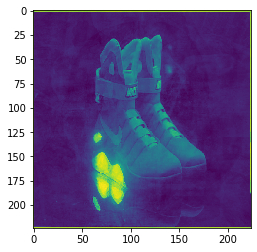

In [27]:
plt.imshow(X_recover[0])

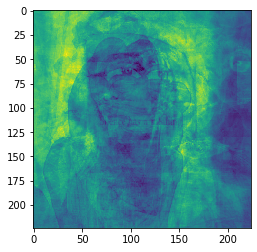

In [28]:
plt.imshow(X_recover[1])

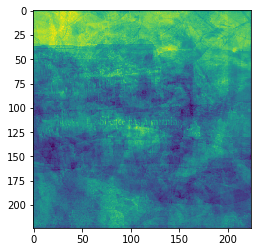

In [29]:
plt.imshow(X_recover[2])

#### Classifying using Support Vector Machines

In [30]:
from sklearn.svm import SVC
Fclassifier = SVC()
#Fclassifier.fit(x_train, y_train)

In [31]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C' : [1,100,1000], 'kernel':['linear']},
              {'C' : [1,100,1000], 'kernel':['rbf'], 'gamma':[0.5,0.1, 0.01,0.001,0.0001]}]

grid_search = GridSearchCV(estimator = Fclassifier, 
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs =-1)
grid_search = grid_search.fit(x_train, y_train)

In [32]:
best_accuracy = grid_search.best_score_
best_accuracy * 100 # Multiplied by 100 to get in percentage 

51.90476190476191

In [33]:
best_parameters = grid_search.best_params_
best_parameters

{'C': 1, 'kernel': 'linear'}

In [34]:
Fclassifier = grid_search.best_estimator_
Fclassifier.fit(x_train, y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [35]:
y_pred = Fclassifier.predict(x_test)

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
cn = confusion_matrix(y_test, y_pred)

In [37]:
print(cn)

[[8 1]
 [3 4]]


In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.89      0.80         9
           1       0.80      0.57      0.67         7

    accuracy                           0.75        16
   macro avg       0.76      0.73      0.73        16
weighted avg       0.76      0.75      0.74        16



In [39]:
print(accuracy_score(y_pred, y_test) * 100)

75.0


In [40]:
# analysis

In [41]:
# What does the x_test look like?
x_test

array([[-7.55224723e+03,  7.84746151e+00, -5.69564804e+03,
         2.52898950e+03,  6.38994561e+03, -2.77139459e+02,
         2.12462640e+03, -9.30204021e+02, -2.68918992e+03,
        -3.33055602e+02,  3.02774447e+00, -8.77085474e+02,
         6.49538679e+02, -9.78664470e+02,  1.68533803e+03,
         8.34181023e+02, -6.44815782e+02, -9.79261059e+02,
         8.62774833e+02,  1.36317029e+03,  7.64879734e+02,
         4.52597259e+02, -2.68433249e+02, -2.34799309e+02,
         3.04823488e+02,  2.35156020e+02, -9.88380016e+02,
        -6.30957579e+02,  1.58886818e+03,  4.72236780e+01,
        -4.03873882e-01, -2.53750367e+01,  3.47557449e+02,
        -4.50468967e+01, -8.98812481e+02, -4.42352281e+02,
         1.09371480e+03, -7.39754107e+02,  1.15867063e+03,
        -2.73909593e+02, -3.94621614e+02],
       [-6.16386085e+03, -1.10737877e+03, -3.64093986e+03,
        -1.75539287e+03, -4.84611990e+03, -3.61830974e+02,
         9.62730563e+02, -3.04260415e+03,  1.32624095e+03,
         1.14

In [42]:
x_test.shape

(16, 41)

In [43]:
test_recover = pca.inverse_transform(x_test)

In [45]:
test_recover = test_recover.reshape((16,224,224))

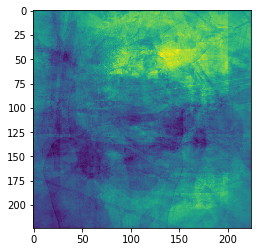

In [46]:
plt.imshow(test_recover[0])

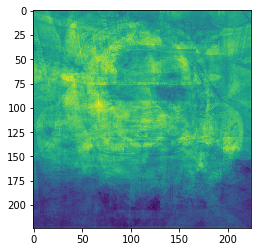

In [47]:
plt.imshow(test_recover[1])

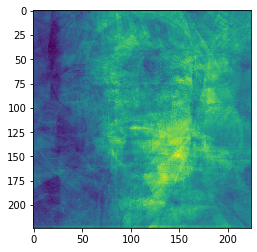

In [48]:
plt.imshow(test_recover[2])

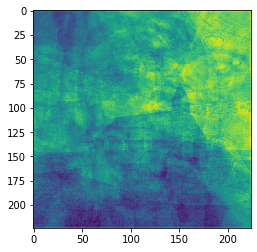

In [49]:
plt.imshow(test_recover[3])

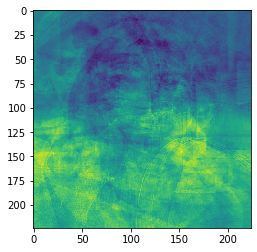

In [52]:
plt.imshow(test_recover[4])

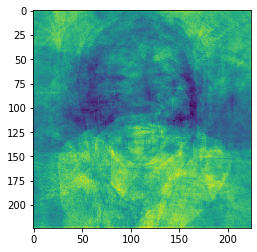

In [54]:
plt.imshow(test_recover[5])

In [53]:
print(y_pred)

[0 0 0 0 1 1 0 0 1 0 0 1 1 0 0 0]


In [51]:
print(y_test)

[0 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0]


###### REFERENCES

In [ ]:
# * : means I referrenced these materials more.

# * https://www.kaggle.com/hamishdickson/preprocessing-images-with-dimensionality-reduction
# https://shankarmsy.github.io/posts/pca-sklearn.html
# * https://scikit-learn.org/stable/auto_examples/applications/plot_face_recognition.html